# Задание 1

C:\Users\Рычков Ярослав\AppData\Local\Temp\ipykernel_12960\2674970854.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean = data.replace('-',np.nan).dropna()


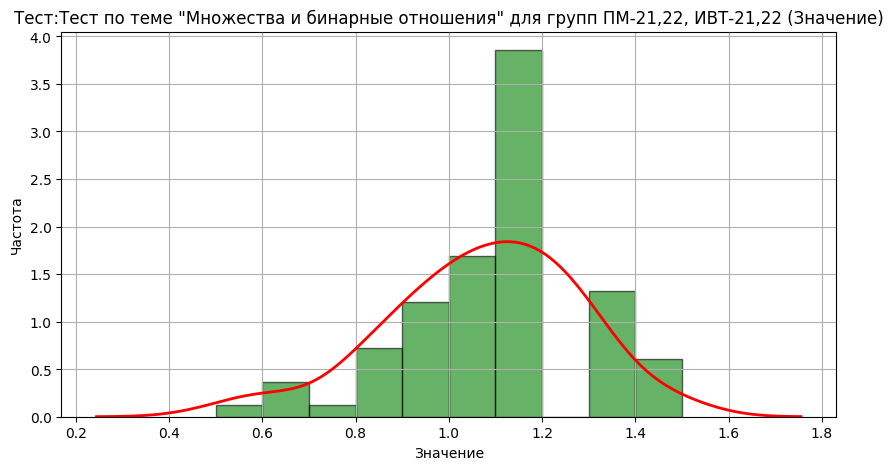

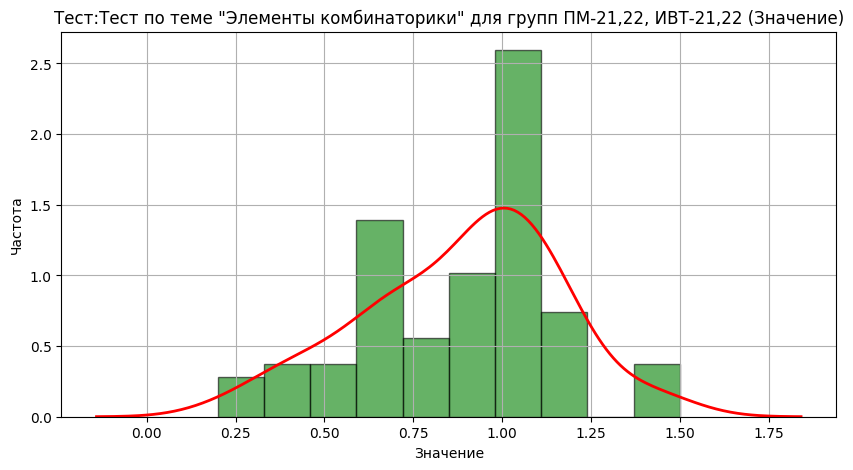

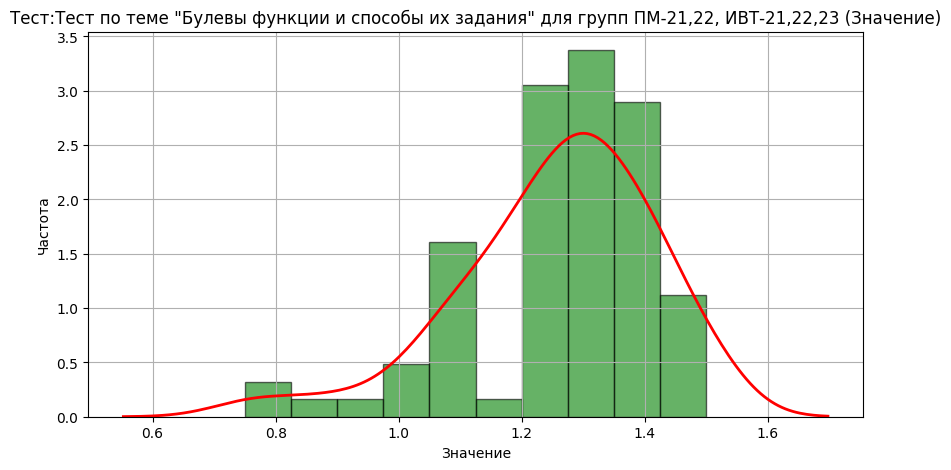

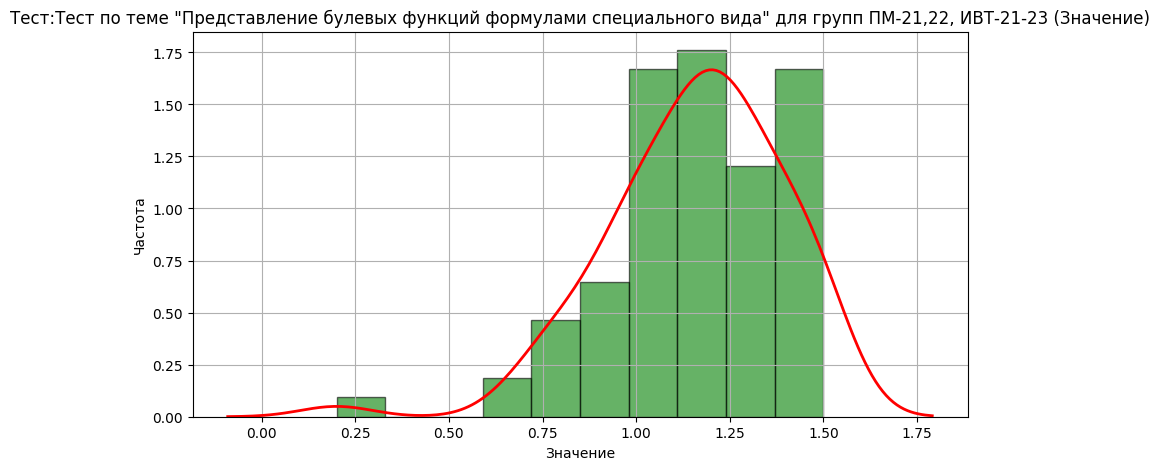

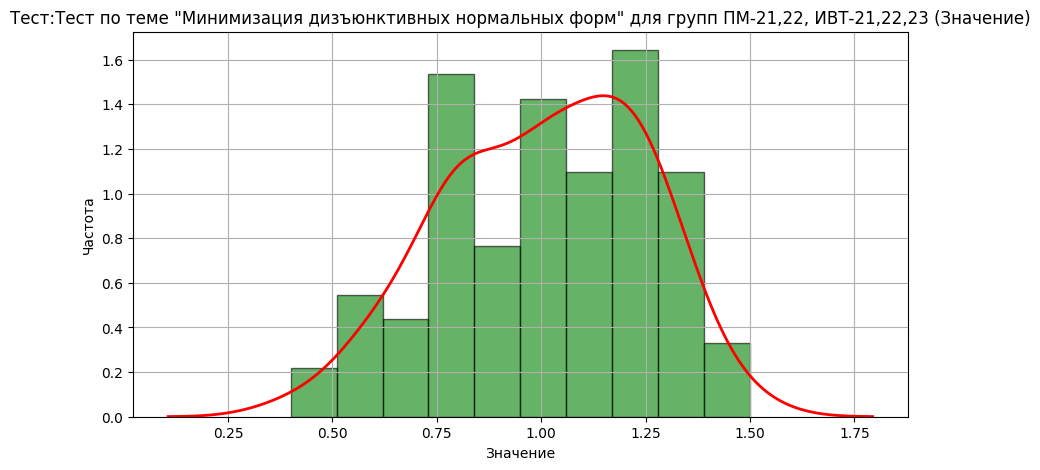

Вывод: Столбец A выглядит нормально распределенным, а столбец C после преобразования может быть показательным


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm, expon, chi2, chisquare
from scipy.stats import kstest

data = pd.read_excel('Data_7_1.xlsx',sheet_name='Лист3',header=0)
columns = data.columns
data_clean = data.replace('-',np.nan).dropna()

for col in columns:
    plt.figure(figsize=(10,5))
    plt.hist(data_clean[col],bins=10,density=True,alpha=0.6,color='green',edgecolor='black')
    sns.kdeplot(data_clean[col],color='red',linewidth=2)
    plt.title(f'{col}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

print('Вывод: Столбец A выглядит нормально распределенным, а столбец C после преобразования может быть показательным')

def print_intervals(bin_edges,obs,exp,dist_type):
    print('\nИнтервалы и частоты:')
    for i in range(len(bin_edges)-1):
        #границы интервалов
        lower = '-∞' if (i == 0 and dist_type == 'norm') else f"{bin_edges[i]:.2f}"
        upper = '+∞' if (i == len(bin_edges)-2) else f"{bin_edges[i+1]:.2f}"
    
        print(f'[{lower}, {upper}):')
        print(f'  Выборочная частота: {obs[i]}')
        print(f'  Гипотетическая теоретическая частота: {exp[i]:.2f}')

### 1)

In [35]:
A = pd.to_numeric(data.iloc[:, 0], errors='coerce').dropna()

m,sigma = norm.fit(A)
print(f'Оценки параметров нормального распределения для выборки А: m = {m:.2f}, σ = {sigma:.2f}')

#разбиваю данные на интервалы
hist, bin_edges = np.histogram(A,bins=6)
obs = hist

#ожид. частоты
cdf = norm.cdf(bin_edges,m,sigma)
exp = len(A) * np.diff(cdf)
exp[0] = len(A) * norm.cdf(bin_edges[1],m,sigma) 
exp[-1] = len(A) * (1 - norm.cdf(bin_edges[-2],m,sigma))

print_intervals(bin_edges,obs,exp,'norm')

#объед. интервалов, если ожид. частоты <5
while any(exp < 5):
    #нахожу интервал с наим. ожид. частотой
    min_idx = np.argmin(exp)
    
    #объед. с соседним интервалом
    if min_idx == 0:
        #объед. с правым соседом
        exp[min_idx+1] += exp[min_idx]
        obs[min_idx+1] += obs[min_idx]
        exp = np.delete(exp,min_idx)
        obs = np.delete(obs,min_idx)
        bin_edges = np.delete(bin_edges,min_idx + 1)
    elif min_idx == len(exp) - 1:
        #объед. с левым соседом
        exp[min_idx-1] += exp[min_idx]
        obs[min_idx-1] += obs[min_idx]
        exp = np.delete(exp,min_idx)
        obs = np.delete(obs,min_idx)
        bin_edges = np.delete(bin_edges,min_idx)
    else:
        #выбираю соседа с меньшей ожидаемой частотой
        if exp[min_idx-1] < exp[min_idx+1]:
            #объед. с левым соседом
            exp[min_idx-1] += exp[min_idx]
            obs[min_idx-1] += obs[min_idx]
            exp = np.delete(exp,min_idx)
            obs = np.delete(obs,min_idx)
            bin_edges = np.delete(bin_edges,min_idx)
        else:
            #объед. с правым соседом
            exp[min_idx+1] += exp[min_idx]
            obs[min_idx+1] += obs[min_idx]
            exp = np.delete(exp,min_idx)
            obs = np.delete(obs,min_idx)
            bin_edges = np.delete(bin_edges,min_idx+1)

#хи-квадрат
chi2_stat = np.sum((obs-exp)**2 / exp)
dof = len(exp)-1-2  
crit_value = chi2.ppf(0.95,dof)
p = 1 - chi2.cdf(chi2_stat,dof)


print(f'\nχ² = {chi2_stat:.3f}')
print(f'Критическое значение (α=0.05) = {crit_value:.3f}')
print(f'p-значение = {p:.3f}')
if chi2_stat < crit_value:
    print('Вывод: Не отвергаем H0 - данные соответствуют нормальному распределению')
else:
    print('Вывод: Отвергаем H0 - данные не соответствуют нормальному распределению')

Оценки параметров нормального распределения для выборки А: m = 1.03, σ = 0.25

Интервалы и частоты:
[-∞, 0.25):
  Выборочная частота: 1
  Гипотетическая теоретическая частота: 0.10
[0.25, 0.50):
  Выборочная частота: 0
  Гипотетическая теоретическая частота: 1.77
[0.50, 0.75):
  Выборочная частота: 14
  Гипотетическая теоретическая частота: 12.42
[0.75, 1.00):
  Выборочная частота: 20
  Гипотетическая теоретическая частота: 34.63
[1.00, 1.25):
  Выборочная частота: 53
  Гипотетическая теоретическая частота: 38.60
[1.25, +∞):
  Выборочная частота: 20
  Гипотетическая теоретическая частота: 20.48

χ² = 11.601
Критическое значение (α=0.05) = 3.841
p-значение = 0.001
Вывод: Отвергаем H0 - данные не соответствуют нормальному распределению


### 2)

In [36]:
B = pd.to_numeric(data.iloc[:, 2], errors='coerce').dropna()

#преобразование
B_s = B+1  
B_log = np.log(B_s)
trans_B = B_log - np.min(B_log)

lambda_p = 1/np.mean(trans_B)
print(f'Оценка параметра показательного распределения для преобразованной выборки В: λ = {lambda_p:.2f}')

#разбиваю данные на интервалы
hist, bin_edges = np.histogram(trans_B,bins=4)
obs = hist

#ожид. частоты
cdf = expon.cdf(bin_edges,scale=1/lambda_p)
exp = len(trans_B) * np.diff(cdf)
exp[0] = len(trans_B) * expon.cdf(bin_edges[1],scale=1/lambda_p)
exp[-1] = len(trans_B) * (1-expon.cdf(bin_edges[-2],scale=1/lambda_p))

print_intervals(bin_edges,obs,exp,'expon')

#объед интервалы, если ожид. частоты <5
while any(exp < 5):
    min_idx = np.argmin(exp) #нахожу интервал с наим. ожид. частотой
    #объед. с соседним интервалом:
    if min_idx == 0:
        #объед. с правым соседом
        exp[min_idx+1] += exp[min_idx]
        obs[min_idx+1] += obs[min_idx]
        exp = np.delete(exp,min_idx)
        obs = np.delete(obs,min_idx)
        bin_edges = np.delete(bin_edges,min_idx + 1)
    elif min_idx == len(exp) - 1:
        #объед. с левым соседом
        exp[min_idx-1] += exp[min_idx]
        obs[min_idx-1] += obs[min_idx]
        exp = np.delete(exp,min_idx)
        obs = np.delete(obs,min_idx)
        bin_edges = np.delete(bin_edges,min_idx)
    else:
        #выбираю соседа с меньшей ожид. частотой
        if exp[min_idx-1] < exp[min_idx+1]:
            #объед. с левым соседом
            exp[min_idx-1] += exp[min_idx]
            obs[min_idx-1] += obs[min_idx]
            exp = np.delete(exp,min_idx)
            obs= np.delete(obs,min_idx)
            bin_edges = np.delete(bin_edges,min_idx)
        else:
            #объед. с правым соседом
            exp[min_idx+1] += exp[min_idx]
            obs[min_idx+1] += obs[min_idx]
            exp = np.delete(exp,min_idx)
            obs = np.delete(obs,min_idx)
            bin_edges = np.delete(bin_edges,min_idx+1)

#хи-квадрат
chi2_stat = np.sum((obs-exp)**2 / exp)
dof = len(exp)-1-1  
crit_value = chi2.ppf(0.95,dof)
p = 1 - chi2.cdf(chi2_stat,dof)

print(f'\nχ² = {chi2_stat:.3f}')
print(f'Критическое значение (α=0.05) = {crit_value:.3f}')
print(f'p-значение = {p:.3f}')
if chi2_stat < crit_value:
    print('Вывод: Не отвергаем H0 - данные соответствуют показательному распределению')
else:
    print('Вывод: Отвергаем H0 - данные не соответствуют показательному распределению')

Оценка параметра показательного распределения для преобразованной выборки В: λ = 1.93

Интервалы и частоты:
[0.00, 0.16):
  Выборочная частота: 2
  Гипотетическая теоретическая частота: 29.26
[0.16, 0.33):
  Выборочная частота: 5
  Гипотетическая теоретическая частота: 21.33
[0.33, 0.49):
  Выборочная частота: 28
  Гипотетическая теоретическая частота: 15.55
[0.49, +∞):
  Выборочная частота: 73
  Гипотетическая теоретическая частота: 41.85

χ² = 71.043
Критическое значение (α=0.05) = 5.991
p-значение = 0.000
Вывод: Отвергаем H0 - данные не соответствуют показательному распределению


# Задание 2

### 1)

In [37]:
from scipy import stats
from scipy.stats import shapiro, probplot, norm, boxcox
import seaborn as sns

def box_cox(data):
    if any(data <= 0):
        data = data - np.min(data) + 0.1
    trans, _ = boxcox(data)
    return trans

AA = box_cox(A.copy())
BB = box_cox(B.copy())

### 2)

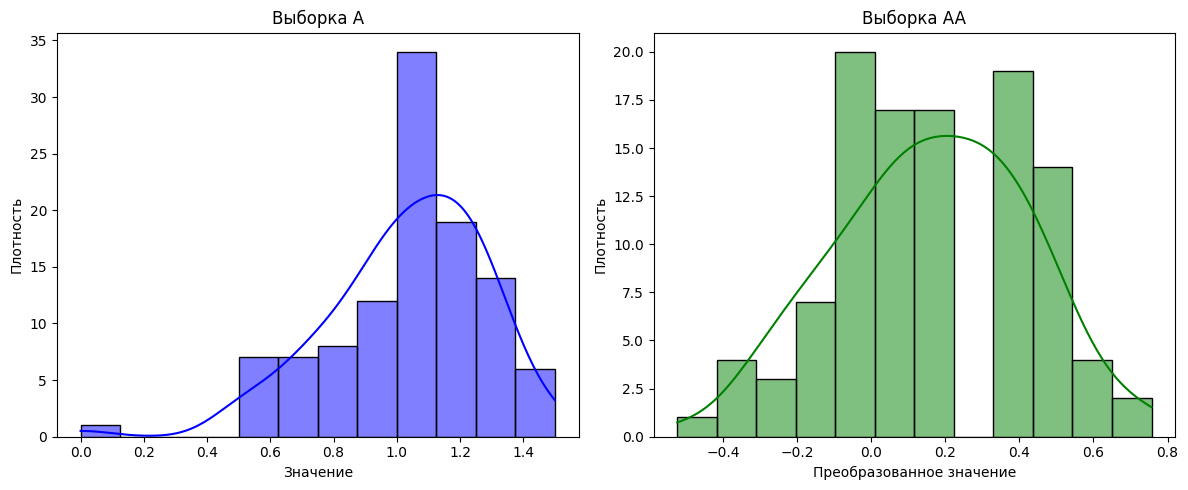

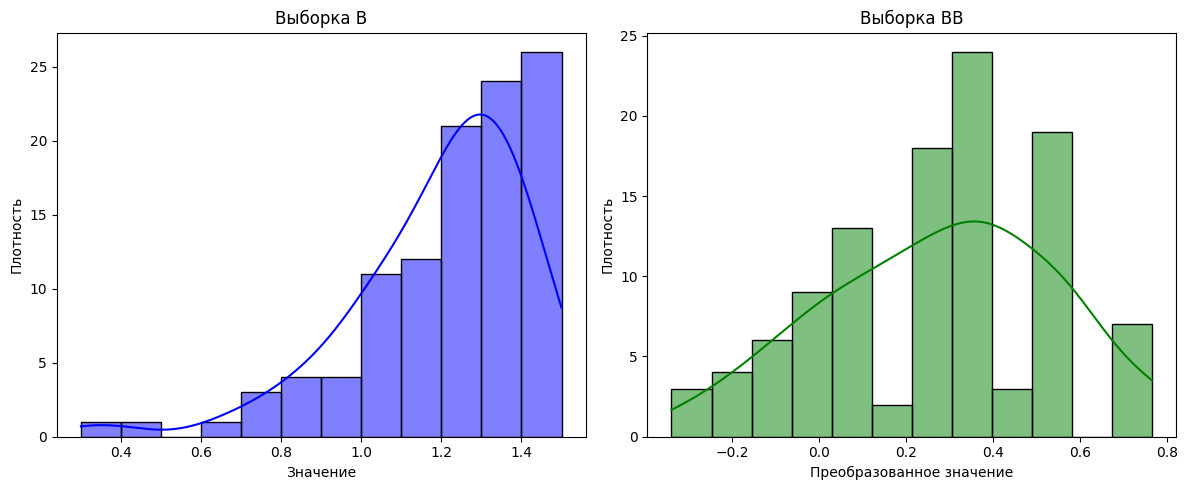

In [38]:
def gist(orig,trans,name1,name2):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    #A и B:
    sns.histplot(orig,kde=True,ax=ax1,color='blue',bins=12)
    ax1.set_title(f'{name1}')
    ax1.set_xlabel('Значение')
    ax1.set_ylabel('Плотность')
    #AA и BB:
    sns.histplot(trans,kde=True,ax=ax2,color='green',bins=12)
    ax2.set_title(f'{name2}')
    ax2.set_xlabel('Преобразованное значение')
    ax2.set_ylabel('Плотность')
    
    plt.tight_layout()
    plt.show()

gist(A,AA,'Выборка A','Выборка AA')
gist(B,BB,'Выборка B','Выборка BB')

### Вывод: Преобразование Бокса-Кокса успешно справилось с нормализацией данных, особенно для выборки B, которая изначально имела более выраженные отклонения.

### 3)

In [39]:
def shu(data,name):
    stat,p = shapiro(data)
    print(f'{name}:')
    print(f'  Статистика = {stat:.4f}, p = {p:.4f}')
    print('  Вывод: данные' + (' соответствуют' if p > 0.05 else ' не соответствуют') + ' нормальному распределению')

print('\nРезультаты теста Шапиро-Уилка:')
shu(A,'Выборка A')
shu(AA,'Выборка AA')
shu(B,'Выборка B')
shu(BB,'Выборка BB')


Результаты теста Шапиро-Уилка:
Выборка A:
  Статистика = 0.9434, p = 0.0002
  Вывод: данные не соответствуют нормальному распределению
Выборка AA:
  Статистика = 0.9777, p = 0.0667
  Вывод: данные соответствуют нормальному распределению
Выборка B:
  Статистика = 0.8948, p = 0.0000
  Вывод: данные не соответствуют нормальному распределению
Выборка BB:
  Статистика = 0.9671, p = 0.0089
  Вывод: данные не соответствуют нормальному распределению


### 4)

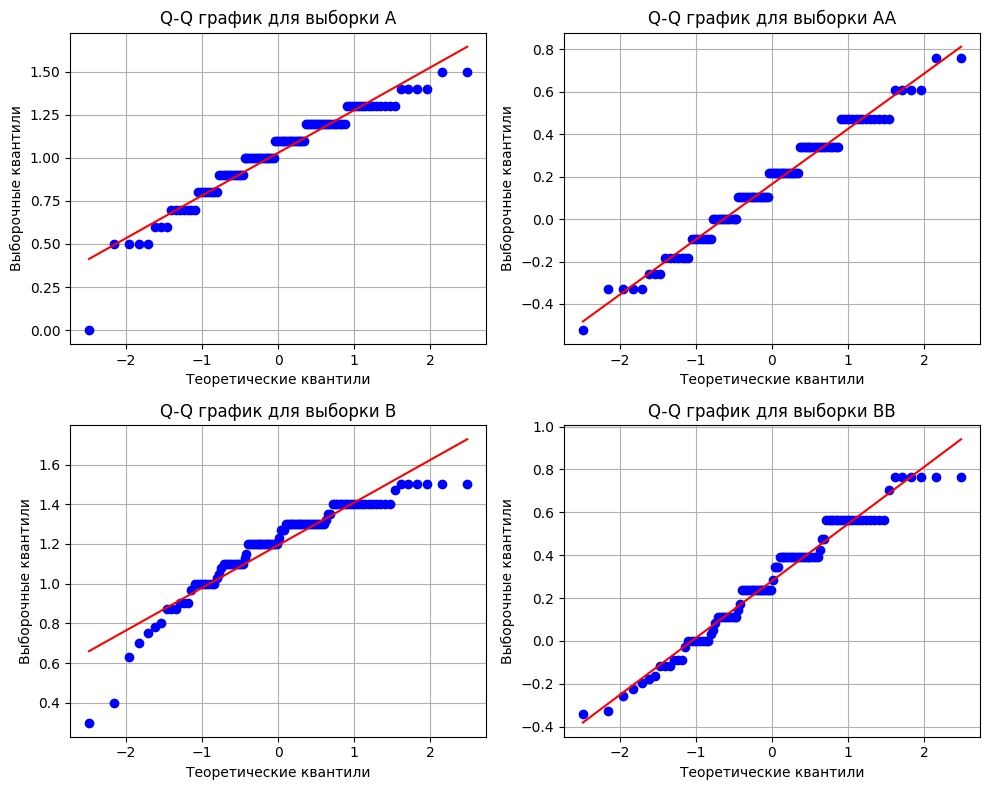

In [40]:
def qq(data,name,position):
    probplot(data,dist='norm',plot=position)
    position.set_title(f'Q-Q график для {name}')
    position.set_xlabel('Теоретические квантили')  
    position.set_ylabel('Выборочные квантили')
    position.grid(True)

fig,axs = plt.subplots(2,2,figsize=(10,8))
qq(A,'выборки A',axs[0,0])
qq(AA,'выборки AA',axs[0,1])
qq(B,'выборки B',axs[1,0])
qq(BB,'выборки BB',axs[1,1])
plt.tight_layout()
plt.show()

### Вывод: Результаты пунктов 3 и 4 взаимно дополняют друг друга. Преобразование Бокса-Кокса успешно нормализовало данные, что подтверждается как статистическими тестами, так и визуальными методами.